In [1]:
import sys
import delivery_driver as dd
sys.path.append("../../deliveryrobot")
from utilities.utilities import *
import time

Robot setup complete in 2.3757526874542236 seconds


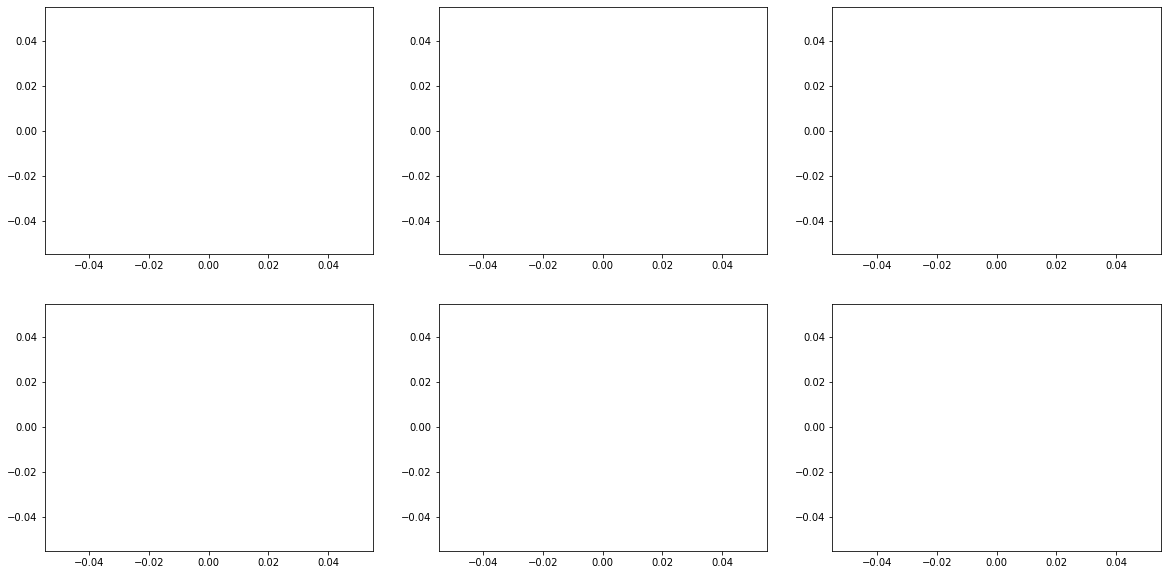

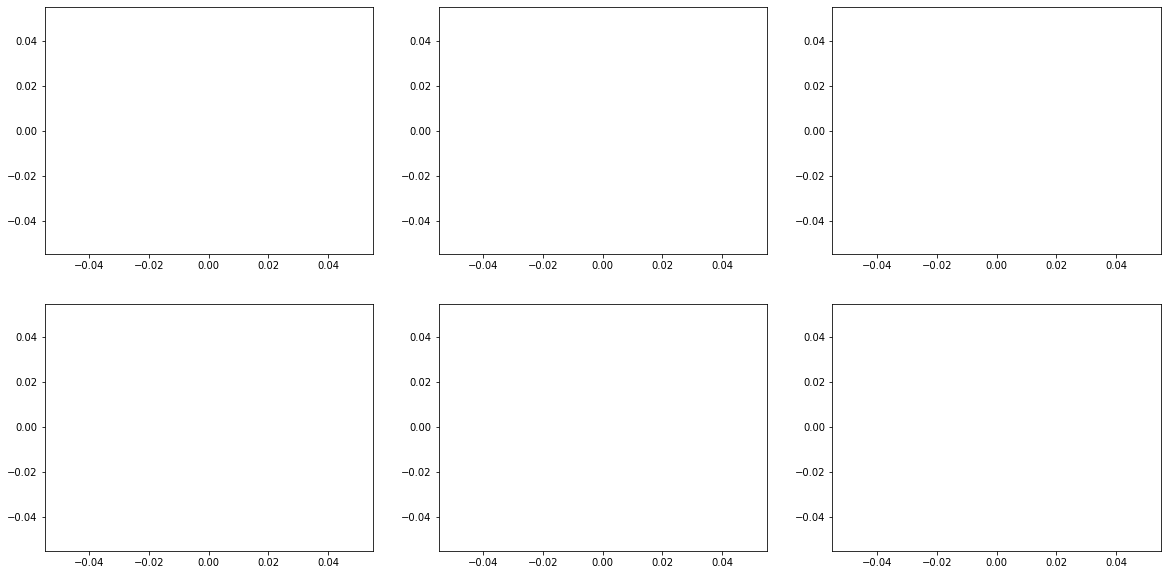

In [2]:
start_time = time.time()
robot = dd.DeliveryRobot()
print(f"Robot setup complete in {time.time()-start_time} seconds")

In [18]:
speed = np.array([0.2,0.2])
speed *= 0.2/0.27
print(speed)
robot.robot.set_motors(speed[0],speed[1])
time.sleep(3)
robot.robot.stop()

[0.14814815 0.14814815]


In [17]:
import kinematics.movementai as ai
start_time = time.time()
steering = ai.SteeringOutput([0.2,0.0],0.0)
left, right = robot.robot_ai.get_drive_params(steering, 1)
print(left,right)
robot.robot.set_motors(left,right)
print("Duration:", time.time() - start_time)
time.sleep(0.5)
robot.robot.stop()

0
0.0
0.0
[0.2, 0.0] 0.0
3.076923076923077 3.076923076923077
Duration: 0.028421640396118164


In [3]:
import matplotlib.pyplot as plt
import cv2
i=0

In [4]:
"""filename = f"calibration_{i}.jpg"
i += 1
filename = robot.take_picture(cal_dir, filename)
img = cv2.imread(filename)
plt.imshow(img)"""

'filename = f"calibration_{i}.jpg"\ni += 1\nfilename = robot.take_picture(cal_dir, filename)\nimg = cv2.imread(filename)\nplt.imshow(img)'

In [16]:
from sensors.camera.apriltagsensor import *
from sensors.calibration.camera_calibration import *


filename = "live_april"
start_time = time.time()
sensor = AprilTagSensor(cal_dir)
print(f"Sensor calibration and setup in {time.time()-start_time} seconds")
path = robot.take_picture(image_dir + "/testing/pose_test/")
measurements={}
start_time = time.time()
sensor.detect(path, measurements)
print(f"Sensor detections in {time.time()-start_time} seconds")
print(measurements)

AprilTag sensor setup COMPLETE
Sensor calibration and setup in 0.006963253021240234 seconds
Sensor detections in 0.11592817306518555 seconds
{'2': [0.5877888686558119, 0.06206670542000068, -0.053509025719051084]}


In [13]:
sys.path.append("../../deliveryrobot")

from navigation.slam.onlineslam import *

slam = OnlineSLAM(3)
slam.debug = False
start_time = time.time()
slam.process_measurements(measurements)
slam.process_movement(0,0)
slam.map_update()
print(f"SLAM sequence in {time.time()-start_time} seconds")

SLAM sequence in 0.024255037307739258 seconds


In [15]:
from navigation.astar.astar import *
goal_state = measurements["4"]
obstacles = {}

scalar = 1
astar = Astar(
    5,
    np.pi/4,
    0.025*scalar,
    1000/scalar,
    1,
    1,
    0.015*scalar
)
astar.debug = False
astar.verbose = False
robot_state = np.array([0.,0.,0.])

start_time = time.time()
test = astar.astar_move(robot_state, obstacles, goal_state)
duration = time.time() - start_time
print(f"Results from Astar came in {duration} seconds and are:")
test.print_info()

02:03:19 - - - - - - UPCOMING PATH:
 - - - - - - - - - - - - - - -

	NODE: 0
                                    	LOC: [0. 0. 0.]

	NODE: 7
                                    	LOC: [0.02469221 0.00391086 0.15707963]

	NODE: 17
                                    	LOC: [0.04938442 0.00782172 0.15707963]

	NODE: 28
                                    	LOC: [0.07407663 0.01173258 0.15707963]

	NODE: 39
                                    	LOC: [0.09876883 0.01564345 0.15707963]

	NODE: 50
                                    	LOC: [0.12346104 0.01955431 0.15707963]

	NODE: 61
                                    	LOC: [0.14815325 0.02346517 0.15707963]

	NODE: 72
                                    	LOC: [0.17284546 0.02737603 0.15707963]

	NODE: 83
                                    	LOC: [0.19753767 0.03128689 0.15707963]

	NODE: 94
                                    	LOC: [0.22222988 0.03519775 0.15707963]

	NODE: 105
                                    	LOC: [0.24692209 0.03910862 0.

In [17]:
import kinematics.movementai as ai
steering = ai.SteeringOutput([0.05,0.0],0.0)
left, right = robot.robot_ai.get_drive_params(steering, 1)
print(left,right)
robot.robot.left(left)
robot.robot.right(right)
time.sleep(0.5)
robot.robot.stop()

0
0.0
0.0
[0.0, 0.0] 0.0
3.4615384615384617 3.4615384615384617
3.4615384615384617 3.4615384615384617


In [16]:
"""
robot.target_ai.slam_update([1,0,0])

start_time = time.time()
path_following = True

robot.update_path_ai([(0,[0.0,0.0]),(1,[0.5,0.0]),(2,[0.75, 0.25])])
while path_following:
    
    # TODO figure out what's going wrong here
    steering = robot.path_follow_ai(0.5)
    robot.robot_ai.estimate_update(steering, time.time() - start_time)
    start_time = time.time()
    
    if steering == None:
        path_following = False
        robot.left(0)
        robot.right(0)"""

"\nrobot.target_ai.slam_update([1,0,0])\n\nstart_time = time.time()\npath_following = True\n\nrobot.update_path_ai([(0,[0.0,0.0]),(1,[0.5,0.0]),(2,[0.75, 0.25])])\nwhile path_following:\n    \n    # TODO figure out what's going wrong here\n    steering = robot.path_follow_ai(0.5)\n    robot.robot_ai.estimate_update(steering, time.time() - start_time)\n    start_time = time.time()\n    \n    if steering == None:\n        path_following = False\n        robot.left(0)\n        robot.right(0)"